In [3]:
import os
import sys
# add ../01_main_scripts to the path to find modules
sys.path.append(os.path.abspath('../01_main_scripts'))
# below line could show warning on VScode, but it would work
from portfolio import portfolio
import subprocess
import datetime
from datetime import date
from datetime import timedelta
import pandas as pd
import numpy as np
import urllib
from crawler import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
from aux_functions import *
from analysis_functions import analyse_history
import gc

In [2]:
print ('portfolio version : ', portfolio.version())

portfolio version :  2.0.0


In [4]:
storage_dir = '../00_data/1_pricesData/2_stock'
backtest_portfolio = portfolio(strategy='maximiseSR',storage_dir=storage_dir)
backtest_portfolio.init_portfolio(init_date=datetime.date(2018,1,1)\
                                  ,rebal_period   =datetime.timedelta(days=20)\
                                  ,lookback_period=datetime.timedelta(days=60)\
                                  ,rebal_gauge    =datetime.timedelta(days=1)\
                                  ,init_val=100000000\
                                  ,assets=['003670', '192080', '068270', '282330', '035720']\
                                  ,allow_frac=False\
                                  ,risk_free_rate='../00_data/1_pricesData/0_riskFree/KrBond30.csv'\
                                  ,tax_rate=0.00015\
                                  ,eval_bench=True\
                                  ,benchmark_file='../00_data/1_pricesData/1_ETF/069500.csv'\
                                  )
backtest_portfolio.get_initial_status()

weight -> deprecated in this strategy. It will automatically determine weights of assets.
[porfolio:init_portfolio] Initial date of underlying assets and benchmark data do not coincide with each other.
Initial condition of the portfolio
strategy         :  maximiseSR
------------------------------------------------------------
Storage path     :  ../00_data/1_pricesData/2_stock
assets           :  ['003670', '192080', '068270', '282330', '035720']
weights          :  [0.2, 0.2, 0.2, 0.2, 0.2]  -> deprecated in this strategy.
Initial value    :  100000000
Initial date     :  2018-01-01
rebal. period    :  20  days
rebal. gauge     :  1  days
look-back period :  60  days
allos fract.     :  False
veto (-) yeidls  :  True
Benchmark        : Equal-weight portfolio
Risk-free intrst.:  ../00_data/1_pricesData/0_riskFree/KrBond30.csv


In [7]:
backtest_history = backtest_portfolio.get_history()
backtest_history

[portfolio:elapse] Stop passing time. It reached to the end of the data.


,date,portfolio_value,t003670,t192080,t068270,t282330,t035720,n003670,n192080,n068270,...,n035720,p003670,p192080,p068270,p282330,p035720,cash,benchmark_value,rf_yield,rebalancing
0,2018-01-01,1.000000e+08,19966500.0,19964400.0,19879200.0,19997500.0,19982600.0,493.0,393.0,88.0,...,682.0,40500.0,50800.0,225900.0,210500.0,29300.0,209800.000,1.000000e+08,1.0,True
1,2018-01-03,1.014832e+08,19448850.0,20553900.0,21709600.0,19237500.0,20323600.0,493.0,393.0,88.0,...,682.0,39450.0,52300.0,246700.0,202500.0,29800.0,209800.000,1.004252e+08,1.0,False
2,2018-01-04,1.013027e+08,18684700.0,20082300.0,22000000.0,19047500.0,21278400.0,493.0,393.0,88.0,...,682.0,37900.0,51100.0,250000.0,200500.0,31200.0,209800.000,9.963554e+07,1.0,False
3,2018-01-05,1.041328e+08,20114400.0,20043000.0,23487200.0,19000000.0,21278400.0,493.0,393.0,88.0,...,682.0,40800.0,51000.0,266900.0,200000.0,31200.0,209800.000,1.009871e+08,1.0,False
4,2018-01-08,1.069538e+08,19695350.0,19767900.0,26620000.0,18905000.0,21755800.0,493.0,393.0,88.0,...,682.0,39950.0,50300.0,302500.0,199000.0,31900.0,209800.000,1.016705e+08,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,2021-06-16,1.613337e+08,0.0,44413200.0,0.0,29808000.0,87087000.0,0.0,676.0,0.0,...,609.0,144500.0,65700.0,271500.0,184000.0,143000.0,25477.855,1.323918e+08,1.0,False
851,2021-06-17,1.631491e+08,0.0,43669600.0,0.0,29322000.0,90132000.0,0.0,676.0,0.0,...,609.0,147000.0,64600.0,269000.0,181000.0,148000.0,25477.855,1.316325e+08,1.0,False
852,2021-06-18,1.681965e+08,0.0,44616000.0,0.0,29160000.0,94395000.0,0.0,676.0,0.0,...,609.0,149500.0,66000.0,270000.0,180000.0,155000.0,25477.855,1.320273e+08,1.0,False
853,2021-06-21,1.672367e+08,0.0,43737200.0,0.0,29079000.0,94395000.0,0.0,676.0,0.0,...,609.0,147500.0,64700.0,280500.0,179500.0,155000.0,25477.855,1.307517e+08,1.0,False


In [8]:
backtest_portfolio.get_status()

 - status of portfolio -
* portfolio strategy :  maximiseSR
* underlying assets  :  ['003670', '192080', '068270', '282330', '035720']
------------------------------------------------------------
* date      :  2021-06-22
* value     :  168834677.85500002 (initial value = 100000000)
------------------------------------------------------------
* returns
 after tax  : 68.83% (growth), 16.69% (annual)
 |-benchmark: 31.65% (growth), 8.44% (annual)
before tax  : 69.12% (growth), 16.75% (annual)
------------------------------------------------------------
* tax
total tax   : 282722.145(0.41% of profit)
------------------------------------------------------------
* maximum drawdown(m.d.d.)
m.d.d.      : 43.393% from 2018-03-21 to 2020-03-19
 |-benchmark: 40.654% from 2018-01-29 to 2020-03-19
------------------------------------------------------------
Inventory
   |= 003670      : total 0.0 (0.00%)
   |   |- volume  :  0
   |   |- prices  :  145500.0
   |   |- MDD     :  57.618%(from 2018-11-

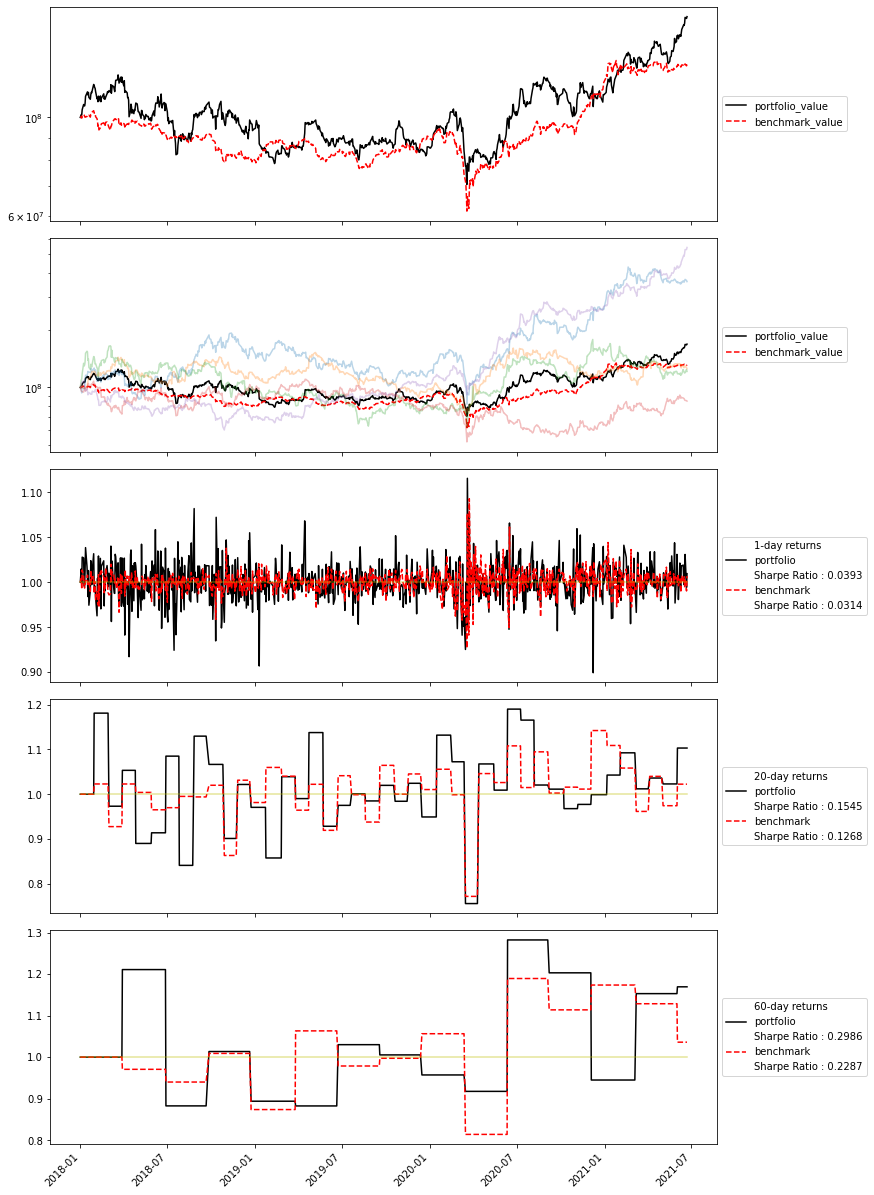

In [9]:
fig, ax, sharpe_ratios, mdds, growth_returns, anual_returns = analyse_history(data= backtest_history,time_scales=[1,20,60])